#  Spotify - AI in Business

#  Problem Statement 
The goal is to predict whether a particular user will skip individual tracks during a listening session. 

To do so, detailed information about the first half of a user's listening session is provided, with the prediction taking place on the second half. Furthermore, track characteristics such as flatness, energy, bounciness, and acousticness have been recorded in a separate data set.

In [46]:
#Importing all the necessary libraries for data manipulation
import pandas as pd
import numpy as np
import math

# Importing the Datasets

In [47]:
df = pd.read_csv('/Users/umashankarlath/Documents/UIUC/Fall21/Spotify/log_mini.csv') #reading the user session csv file
tf = pd.read_csv('/Users/umashankarlath/Documents/UIUC/Fall21/Spotify/tf_mini.csv')#reading the csv file having track features

In [48]:
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


Creating the training and test set from the above user information dataframe (as per the problem statement).

In [49]:
#The first set is the training set
l=[]
for i in range(0,len(df)-1):
    if df.loc[i,'session_position']<math.floor((df.loc[i,'session_length']/2)+1):
        l.append(df.loc[i,:])
train_df = pd.DataFrame(l)
#Second one is the test set
t=[]
for i in range(0,len(df)-1):
    if df.loc[i,'session_position']>math.floor((df.loc[i,'session_length']/2)):
        t.append(df.loc[i,:])
test_df = pd.DataFrame(t)

# Merging the Datasets

In [50]:
new_train_df = train_df.merge(tf, left_on='track_id_clean', right_on='track_id')
new_test_df = test_df.merge(tf, left_on='track_id_clean', right_on='track_id')

In [51]:
new_train_df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
2,0_01f86af2-cf48-42a6-9bf8-adb91f072909,7,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,True,True,False,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
3,0_02340c3b-c370-4c98-b759-87be85e11aa3,8,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,True,True,False,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
4,0_02a8ebbd-5a12-4343-a7da-2ea912102f90,2,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,False,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [52]:
new_test_df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,11,20,t_79570b2a-639a-4ec0-9853-71c5299ac44d,True,True,True,False,0,1,...,4,0.037998,-0.573548,0.284808,0.249904,-0.080877,-0.337629,0.116421,-0.337717,0.247187
1,0_0135ed47-ef0c-44a6-9280-f9cd48a86cc3,14,20,t_79570b2a-639a-4ec0-9853-71c5299ac44d,False,True,True,False,0,1,...,4,0.037998,-0.573548,0.284808,0.249904,-0.080877,-0.337629,0.116421,-0.337717,0.247187
2,0_02ff7281-e36f-4bdc-bec2-ca654821c2b8,18,20,t_79570b2a-639a-4ec0-9853-71c5299ac44d,True,True,True,False,0,1,...,4,0.037998,-0.573548,0.284808,0.249904,-0.080877,-0.337629,0.116421,-0.337717,0.247187
3,0_045e80a8-f9bd-4e44-94da-62a1f0e60b9d,15,20,t_79570b2a-639a-4ec0-9853-71c5299ac44d,False,True,True,False,0,0,...,4,0.037998,-0.573548,0.284808,0.249904,-0.080877,-0.337629,0.116421,-0.337717,0.247187
4,0_04da0f43-b10d-4df1-a686-8c6b3e2d5324,15,17,t_79570b2a-639a-4ec0-9853-71c5299ac44d,True,True,True,False,1,0,...,4,0.037998,-0.573548,0.284808,0.249904,-0.080877,-0.337629,0.116421,-0.337717,0.247187


# Data Cleaning and preparing for the algorithm feed

In [53]:
new_train_df.drop(columns=['session_id', 'session_length', 'session_position', 'track_id_clean', 
                          'track_id'], inplace=True, axis=1)

In [54]:
#dropping other skip columns as "skip_2" is the primary outcome variable
new_train_df.drop(columns=['skip_1', 'skip_3', 'not_skipped'], inplace=True, axis=1)

In [55]:
#Dropping Date and release year columns
new_train_df.drop(columns=['date', 'release_year'], axis=1, inplace=True)

In [56]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82756 entries, 0 to 82755
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   skip_2                           82756 non-null  bool   
 1   context_switch                   82756 non-null  int64  
 2   no_pause_before_play             82756 non-null  int64  
 3   short_pause_before_play          82756 non-null  int64  
 4   long_pause_before_play           82756 non-null  int64  
 5   hist_user_behavior_n_seekfwd     82756 non-null  int64  
 6   hist_user_behavior_n_seekback    82756 non-null  int64  
 7   hist_user_behavior_is_shuffle    82756 non-null  bool   
 8   hour_of_day                      82756 non-null  int64  
 9   premium                          82756 non-null  bool   
 10  context_type                     82756 non-null  object 
 11  hist_user_behavior_reason_start  82756 non-null  object 
 12  hist_user_behavior

In [57]:
#Encoding all the columns having object datatype i.e. all categorical data
new_train_df = pd.get_dummies(new_train_df, columns=['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
                                     'mode'])

In [58]:
#Finally encoding boolean values to interger along with our outcome variable i.e. skip_2 - True being 1 and False being 0.
new_train_df['skip_2'] = new_train_df['skip_2'].astype(int)
new_train_df['hist_user_behavior_is_shuffle']=new_train_df['hist_user_behavior_is_shuffle'].astype(int)
new_train_df['premium'] = new_train_df['premium'].astype(int)

In [59]:
#Doing the above same procedure for the test set 
new_test_df.drop(columns=['session_id', 'session_length', 'session_position', 'track_id_clean', 
                          'track_id'], inplace=True, axis=1)
new_test_df.drop(columns=['skip_1', 'skip_3', 'not_skipped'], inplace=True, axis=1)
new_test_df.drop(columns=['date', 'release_year'], axis=1, inplace=True)
new_test_df = pd.get_dummies(new_test_df, columns=['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
                                     'mode'])
new_test_df['skip_2'] = new_test_df['skip_2'].astype(int)
new_test_df['hist_user_behavior_is_shuffle']=new_test_df['hist_user_behavior_is_shuffle'].astype(int)
new_test_df['premium'] = new_test_df['premium'].astype(int)

# Exploratory Data Analysis

In [60]:
df1=new_train_df[['skip_2','context_switch','no_pause_before_play','short_pause_before_play','long_pause_before_play']]

Text(0.5, 0, 'Count')

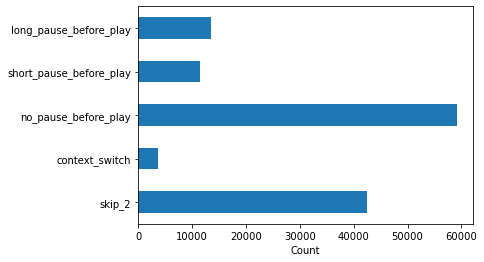

In [61]:
ax=df1.sum().plot.barh()
ax.set_xlabel('Count')

Text(0.5, 1.0, 'No of user vs hour of the day')

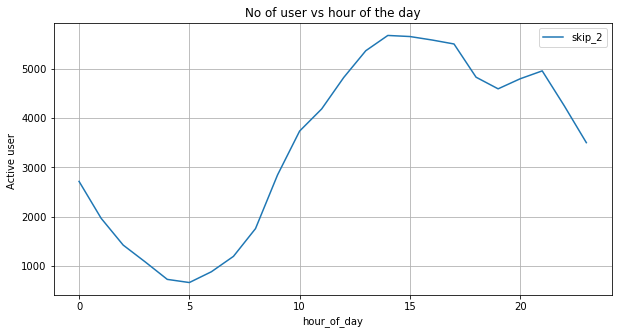

In [62]:
import matplotlib.pyplot as plt
df2 = new_train_df.groupby('hour_of_day').count()
df2.plot( y=['skip_2'], figsize=(10,5), grid=True)
plt.ylabel("Active user ") 
plt.xlabel("hour_of_day")
plt.title("No of user vs hour of the day")

<AxesSubplot:xlabel='session_position'>

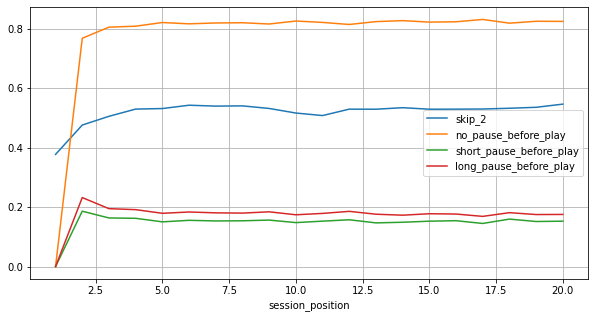

In [63]:
df3=df.groupby('session_position').mean()#df is the inital dataframe defined at the start of the project
df3.plot( y=['skip_2','no_pause_before_play','short_pause_before_play','long_pause_before_play'], figsize=(10,5), grid=True)

In [64]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82756 entries, 0 to 82755
Data columns (total 61 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   skip_2                                      82756 non-null  int64  
 1   context_switch                              82756 non-null  int64  
 2   no_pause_before_play                        82756 non-null  int64  
 3   short_pause_before_play                     82756 non-null  int64  
 4   long_pause_before_play                      82756 non-null  int64  
 5   hist_user_behavior_n_seekfwd                82756 non-null  int64  
 6   hist_user_behavior_n_seekback               82756 non-null  int64  
 7   hist_user_behavior_is_shuffle               82756 non-null  int64  
 8   hour_of_day                                 82756 non-null  int64  
 9   premium                                     82756 non-null  int64  
 10  duration  

# Feature Selection using Random Forest

In [19]:
# Importing all the necessary libraries for feature selection
# Feature selection is done on the training dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [20]:
#Spiltting the data into feature set and outcome variable
X = new_train_df.drop(columns=['skip_2'], axis=1)
X = X.values
y = new_train_df['skip_2']

In [21]:
# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the classifier
rfc.fit(X, y)

# Print the name and gini importance of each feature
for feature in zip(new_train_df.drop(columns=['skip_2']).columns, rfc.feature_importances_):
    print(feature)

('context_switch', 0.002813019141483164)
('no_pause_before_play', 0.01167558118463233)
('short_pause_before_play', 0.005183169033848563)
('long_pause_before_play', 0.005750805440782377)
('hist_user_behavior_n_seekfwd', 0.0030348756136198657)
('hist_user_behavior_n_seekback', 0.007999905486545788)
('hist_user_behavior_is_shuffle', 0.006380081978425023)
('hour_of_day', 0.038436677952232205)
('premium', 0.005782054569839963)
('duration', 0.01340395457103709)
('us_popularity_estimate', 0.012412491723930372)
('acousticness', 0.011433165135305755)
('beat_strength', 0.010865012800787452)
('bounciness', 0.010514082855316747)
('danceability', 0.010964501262195047)
('dyn_range_mean', 0.010656024852897654)
('energy', 0.011089620063045029)
('flatness', 0.011221199794367486)
('instrumentalness', 0.00715411318704969)
('key', 0.006960284485587076)
('liveness', 0.011949142201164328)
('loudness', 0.011548938772940926)
('mechanism', 0.011236283436164235)
('organism', 0.010930064024168325)
('speechiness'

In [22]:
# Create a SelecrFromModel object which will use Random Forest object rfc to select having a gini importance greater 
# than 0.011(threshold)
sfm = SelectFromModel(rfc, threshold=0.011)
# Fit the model
sfm.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.011)

In [29]:
# Printing the features that have gini importance greater than 0.011
for feature_list_index in sfm.get_support(indices=True):
    print((new_train_df.drop(columns=['skip_2']).columns)[feature_list_index])
# Collect the features in an empty list
l=[]
for feature_list_index in sfm.get_support(indices=True):
    l.append(list(new_train_df.drop(columns=['skip_2']).columns)[feature_list_index])

no_pause_before_play
hour_of_day
duration
us_popularity_estimate
acousticness
energy
flatness
liveness
loudness
mechanism
speechiness
tempo
valence
acoustic_vector_0
acoustic_vector_1
acoustic_vector_2
acoustic_vector_3
acoustic_vector_4
acoustic_vector_5
acoustic_vector_6
acoustic_vector_7
hist_user_behavior_reason_start_backbtn
hist_user_behavior_reason_start_fwdbtn
hist_user_behavior_reason_start_trackdone
hist_user_behavior_reason_end_backbtn
hist_user_behavior_reason_end_endplay
hist_user_behavior_reason_end_fwdbtn
hist_user_behavior_reason_end_trackdone


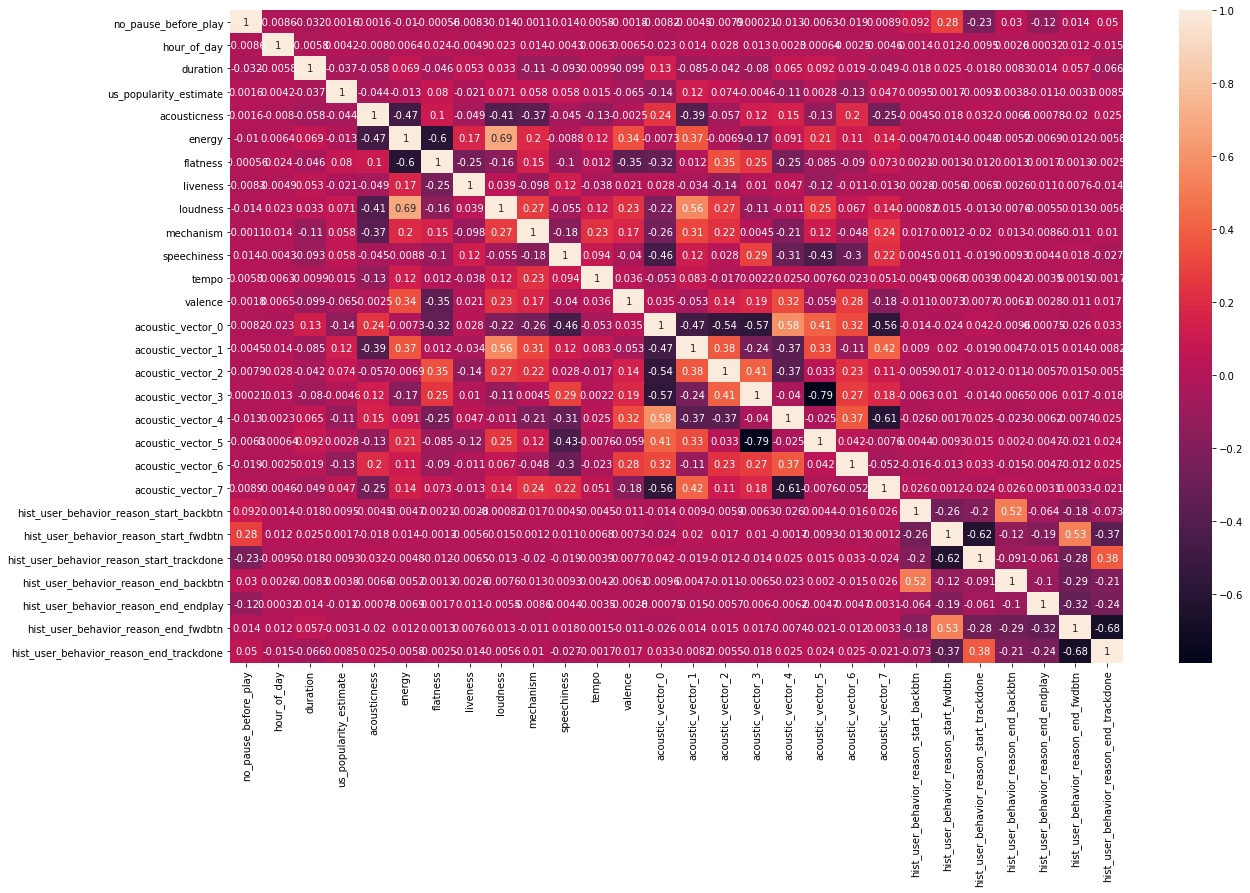

In [30]:
# Check whether the above features are correlated with one another. If so remove one of them
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(new_train_df[l].corr(), annot=True)
plt.show()

In [31]:
# 1) By looking at the heatmap, 'energy' is highly correlated with two columns 'flatness' and 'loudness', 
# so remove 'energy'.
# 2) 'acoustic_vector3' & 'acoustic_vector5' are highly inversely corrleated so remove one of them 
# 3) 'hist_user_behavior_reason_end_fwdbtn' and 'hist_user_behavior_reason_end_trackdone' are again highly 
# inversely correlated, so remove one of them.

unwanted = {'energy', 'acoustic_vector_3', 'hist_user_behavior_reason_start_fwdbtn'}
l = [e for e in l if e not in unwanted]

In [33]:
l

['no_pause_before_play',
 'hour_of_day',
 'duration',
 'us_popularity_estimate',
 'acousticness',
 'flatness',
 'liveness',
 'loudness',
 'mechanism',
 'speechiness',
 'tempo',
 'valence',
 'acoustic_vector_0',
 'acoustic_vector_1',
 'acoustic_vector_2',
 'acoustic_vector_4',
 'acoustic_vector_5',
 'acoustic_vector_6',
 'acoustic_vector_7',
 'hist_user_behavior_reason_start_backbtn',
 'hist_user_behavior_reason_start_trackdone',
 'hist_user_behavior_reason_end_backbtn',
 'hist_user_behavior_reason_end_endplay',
 'hist_user_behavior_reason_end_fwdbtn',
 'hist_user_behavior_reason_end_trackdone']

In [34]:
# Subset the train and test set with the above features and initialize X_train, y_train, X_test, y_test
X_train = new_train_df[l]
y_train = new_train_df['skip_2']
X_test = new_test_df[l]
y_test = new_test_df['skip_2']

In [35]:
X_train.head()

,no_pause_before_play,hour_of_day,duration,us_popularity_estimate,acousticness,flatness,liveness,loudness,mechanism,speechiness,...,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_trackdone
0,0,16,180.066666,99.968133,0.015848,1.035007,0.678553,-6.577,0.546784,0.069717,...,-0.333373,0.015452,-0.35359,0.205826,0,1,0,0,0,1
1,0,21,180.066666,99.968133,0.015848,1.035007,0.678553,-6.577,0.546784,0.069717,...,-0.333373,0.015452,-0.35359,0.205826,0,1,0,0,0,1
2,1,11,180.066666,99.968133,0.015848,1.035007,0.678553,-6.577,0.546784,0.069717,...,-0.333373,0.015452,-0.35359,0.205826,0,0,0,0,1,0
3,1,15,180.066666,99.968133,0.015848,1.035007,0.678553,-6.577,0.546784,0.069717,...,-0.333373,0.015452,-0.35359,0.205826,0,0,0,0,1,0
4,1,15,180.066666,99.968133,0.015848,1.035007,0.678553,-6.577,0.546784,0.069717,...,-0.333373,0.015452,-0.35359,0.205826,0,1,0,0,1,0


In [36]:
# Scale the features as some feature columns have large values compared to others. For ex-'duration'

# Import necessary librabry for scaling
from sklearn.preprocessing import StandardScaler

# Initialize the object
ss = StandardScaler()

# Apply fit_transform for both X_train and X_test datasets
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

#Now data is ready to be feed into different algorithms

# 1) DecisionTree

In [81]:
# Import all necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Fit and find the score for Decision Tree
dct = DecisionTreeClassifier(random_state=14)
dct.fit(X_train, y_train)

print('\n Accuracy score of Decision Tree Classifier on test data: {}'.format(dct.score(X_test, y_test)))


 Accuracy score of Decision Tree Classifier on test data: 0.8398905113776535


# 2) Logistic Regression

In [67]:
# Importing all the necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [79]:
# Fit and find score and AUC on test set
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

print('\n Accuracy score of Logistic Regression on test data: {}'.format(LogReg.score(X_test, y_test)))


 Accuracy score of Logistic Regression on test data: 0.8813951575954795


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 3) LightGBM

In [76]:
# Importing all the necessary libraries for LightGBM model
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Fit and find score for LightGBM
model = LGBMClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

# It would be interesting to see what score ensembling all algorithms would give.


 Accuracy score of Decision Tree Classifier on test data: 0.8398905113776535


# 4) Ensembling all above algorithms

In [80]:
# Import the necessary library
from mlxtend.classifier import EnsembleVoteClassifier

# Fit and find the score
eclf1 = EnsembleVoteClassifier(clfs=[LogReg, dct], weights=[1,1],voting='soft')
eclf1.fit(X_train,y_train)
 

print('\n Accuracy score of Ensemble Vote Classifier on test data: {}'.format(eclf1.score(X_test, y_test)))


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Accuracy score of Decision Tree Classifier on test data: 0.842404520517369


# Recommendation System using KNN
The outcome of the system is to recommend songs to users based on the song features user prefer.

In [82]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.simplefilter("ignore")

In [84]:
tf = pd.read_csv('/Users/umashankarlath/Documents/UIUC/Fall21/Spotify/tf_mini.csv')
tf.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [85]:
tf['track_id'].nunique()==len(tf) # Checking whether number of songs is equal to length of the dataframe

True

In [86]:
l=[]
for i in range(len(tf)):
    l.append(i)
tf['Track_ID']=l
cols = tf.columns.tolist()
cols = cols[-1:] + cols[:-1]
tf=tf[cols]
tf.drop(columns=[ 'time_signature'], inplace=True)

In [87]:
tf['mode'].unique()

array(['major', 'minor'], dtype=object)

In [88]:
tf['mode']=tf['mode'].str.replace('major', '1')
tf['mode']=tf['mode'].str.replace('minor', '0')
tf['mode']=tf['mode'].astype(int)

In [89]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit_transform(tf.iloc[:, 5:])

In [90]:
def RecommendedSongs(neighbors,song_track):
    model=NearestNeighbors()
    model.fit(X)
    distance,indices=model.kneighbors(X[[song_track]], n_neighbors=neighbors)
    print(tf.iloc[indices[0],1])

In [91]:
RecommendedSongs(5,6)

6        t_20675f8a-3a40-40b8-aa9b-0ce64536c65b
13778    t_fd56355c-b066-4f85-b623-0e2e4dc85a93
83       t_037534ef-46bc-49d0-9706-84c942c0dc80
2342     t_05f3187b-6f50-4639-b9c7-773b790b98b5
18199    t_518e1262-7e92-428a-9c5a-26f1733f0286
Name: track_id, dtype: object
